<a href="https://colab.research.google.com/github/salsaaakusuma/Analisis-Sentimen-SWOT/blob/main/Modelling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("hasil_preprocessing.csv")
data.head(5)

,ID,Username,Text,Created At,Cleansing,Case_Folding,Normalized_Text,Tokenizing,Stemming
0,coc_1,sprintgkle,Clash of champions ini cast nya punya beragam ...,17 Juni 2024,Clash of champions ini cast nya punya beragam ...,clash of champions ini cast nya punya beragam ...,clash of champions ini cast nya punya beragam ...,"['clash', 'of', 'champions', 'ini', 'cast', 'n...","['clash', 'of', 'champions', 'ini', 'cast', 'n..."
1,coc_2,coldzonkbie,gue suka bgt sm university war - terus gamau b...,17 Juni 2024,gue suka bgt sm university war terus gamau ber...,gue suka bgt sm university war terus gamau ber...,saya suka banget sama university war terus tid...,"['saya', 'suka', 'banget', 'sama', 'university...","['saya', 'suka', 'banget', 'sama', 'university..."
2,coc_3,Q_Nyitt,UGM -&gt; Matematika -&gt; IPK 4.0 Kek nya ser...,18 Juni 2024,UGM gt Matematika gt IPK Kek nya seru nih nont...,ugm gt matematika gt ipk kek nya seru nih nont...,ugm gitu matematika gitu ipk seperti nya seru ...,"['ugm', 'gitu', 'matematika', 'gitu', 'ipk', '...","['ugm', 'gitu', 'matematika', 'gitu', 'ipk', '..."
3,coc_4,todayis__gaby,Clash of champions seru juga degdegannya ada b...,29 Juni 2024,Clash of champions seru juga degdegannya ada b...,clash of champions seru juga degdegannya ada b...,clash of champions seru juga degdegannya ada b...,"['clash', 'of', 'champions', 'seru', 'juga', '...","['clash', 'of', 'champions', 'seru', 'juga', '..."
4,coc_5,yourjungx,abis nonton clash of champions terus champions...,29 Juni 2024,abis nonton clash of champions terus champions...,abis nonton clash of champions terus champions...,habis menonton clash of champions terus champi...,"['habis', 'menonton', 'clash', 'of', 'champion...","['habis', 'tonton', 'clash', 'of', 'champions'..."


In [ ]:
pip install gensim matplotlib

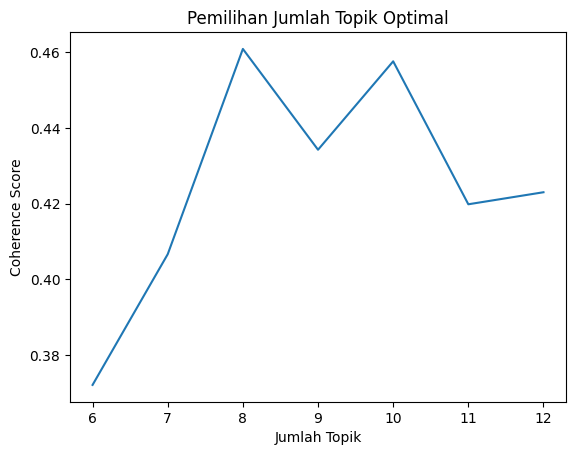

In [ ]:
from gensim.models import CoherenceModel

coherence_values = []
topic_range = range(6, 13)
for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

import matplotlib.pyplot as plt
plt.plot(topic_range, coherence_values)
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.title("Pemilihan Jumlah Topik Optimal")
plt.show()

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer

tokenized_data = [text.split() for text in data['Normalized_Text']]

dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

optimal_num_topics = 8
lda_model_optimal = LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=15)

for idx, topic in lda_model_optimal.print_topics(num_words=15):
    print(f"Topik {idx}: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topik 0: 0.074*"of" + 0.073*"clash" + 0.073*"champions" + 0.064*"seru" + 0.050*"banget" + 0.038*"menonton" + 0.017*"juga" + 0.013*"yang" + 0.010*"ini" + 0.008*"episode" + 0.008*"di" + 0.008*"keren" + 0.006*"tapi" + 0.006*"ya" + 0.005*"habis"
Topik 1: 0.016*"tidak" + 0.016*"dan" + 0.014*"of" + 0.013*"clash" + 0.013*"champions" + 0.013*"dari" + 0.009*"di" + 0.008*"saya" + 0.008*"yang" + 0.007*"kalau" + 0.006*"itu" + 0.006*"orang" + 0.006*"ada" + 0.005*"anak" + 0.005*"jadi"
Topik 2: 0.029*"champions" + 0.029*"of" + 0.029*"clash" + 0.023*"saya" + 0.022*"yang" + 0.017*"menonton" + 0.015*"tidak" + 0.013*"ini" + 0.012*"di" + 0.011*"tapi" + 0.008*"juga" + 0.008*"seru" + 0.008*"sama" + 0.008*"dan" + 0.008*"ada"
Topik 3: 0.039*"of" + 0.037*"champions" + 0.037*"clash" + 0.019*"yang" + 0.016*"banget" + 0.015*"saya" + 0.015*"sudah" + 0.015*"dan" + 0.012*"seru" + 0.012*"orang" + 0.010*"tidak" + 0.009*"di" + 0.008*"keren" + 0.008*"ini" + 0.008*"ya"
Topik 4: 0.013*"yang" + 0.008*"anak" + 0.006*"dan" +